# Split the data into Train and Test 


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
# add the data to be able to do the EDS
df = pd.read_csv('../data/Churn_Modelling.csv')

# print out the first head of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
# Check for Missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# drop all the columns with the missing values
df = df.dropna()

In [5]:
# check the new information to see if there is any missing values
df.isnull().sum()

# a description of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,5003.497499,1.569094e+07,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,2886.321275,7.192399e+04,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2504.250000,1.562854e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5003.500000,1.569073e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7502.750000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
# get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None


In [7]:
# drop the columns that aint needed
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'])

# check the updated dataset
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [8]:
# label encode the Gender column of the Dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
# check updated dataset
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [28]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


# Identify the outliers
outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum()
outliers


CreditScore          15
Gender                0
Age                 359
Tenure                0
Balance               0
NumOfProducts        60
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2038
dtype: int64

In [29]:

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9997,709,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [10]:
# Get the feature columns and the target column
X = df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
y.shape

(9998,)

In [12]:
X.shape


(9998, 9)

In [13]:
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [14]:
# Train split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,0,1,2,3,4,5,6,7,8
0,0.687899,-1.095787,-0.564511,-1.733399,0.629840,-0.911570,0.646028,0.970820,-0.323288
1,-0.719558,0.912586,-0.087751,-1.387619,-1.225860,0.807705,0.646028,-1.030057,-0.937670
2,0.304988,-1.095787,0.293657,0.687065,0.468684,-0.911570,0.646028,0.970820,-0.165917
3,0.367081,0.912586,0.579713,-0.696057,-0.035368,2.526981,0.646028,-1.030057,-0.611954
4,-1.775151,0.912586,1.151824,-1.387619,0.500613,2.526981,0.646028,-1.030057,-0.242950
...,...,...,...,...,...,...,...,...,...
7993,0.025566,0.912586,-0.087751,1.032846,0.686556,-0.911570,0.646028,-1.030057,0.875852
7994,2.064309,0.912586,-0.087751,-1.041838,0.291241,-0.911570,0.646028,0.970820,1.249581
7995,-0.140017,-1.095787,0.484361,-1.733399,1.300545,-0.911570,0.646028,0.970820,0.353940
7996,-0.585022,0.912586,-0.087751,-0.350277,-1.225860,0.807705,-1.547921,-1.030057,1.509080


In [15]:
# Print the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (7998, 9)
Training labels shape: (7998,)
Test features shape: (2000, 9)
Test labels shape: (2000,)


# save the data into their folders 

In [16]:
# save all training into the training and test files
test_dir = '../data/test'
train_dir = '../data/train'

In [18]:
# Save the training and test datasets as CSV files
pd.DataFrame(X_train).to_csv(os.path.join(train_dir, 'X_train.csv'), index=False)
pd.DataFrame(X_test).to_csv(os.path.join(test_dir, 'X_test.csv'), index=False)
pd.DataFrame(y_train).to_csv(os.path.join(train_dir, 'y_train.csv'), index=False)
pd.DataFrame(y_test).to_csv(os.path.join(test_dir, 'y_test.csv'), index=False)

In [19]:
# Model Training to be able to understand the Data Frame
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
X_train = pd.read_csv(os.path.join(train_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(train_dir, 'y_train.csv'))
X_test = pd.read_csv(os.path.join(test_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(test_dir, 'y_test.csv'))


In [25]:
# print just one line of the test data
X_train.head(1)

,0,1,2,3,4,5,6,7,8
0,0.687899,-1.095787,-0.564511,-1.733399,0.62984,-0.91157,0.646028,0.97082,-0.323288


In [54]:
# build the model to be able to fully understand the data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.values.ravel())

# make predictions
y_pred = model.predict(X_test)


In [55]:
# get the score of the model
accuracy_score(y_test, y_pred)


0.849

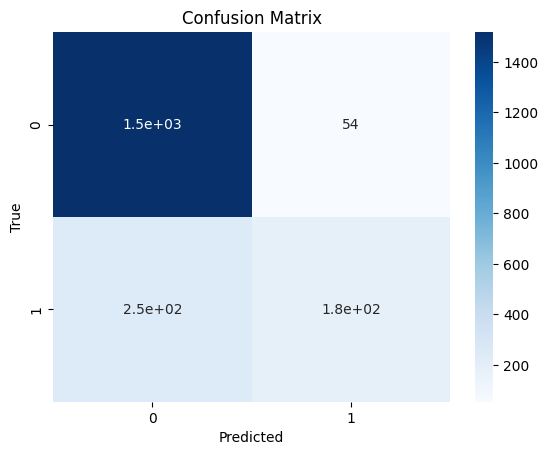

In [60]:
# nake a confusion matrix of the model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# get the confusion matrix
confusion_matrix(y_test, y_pred)

# plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



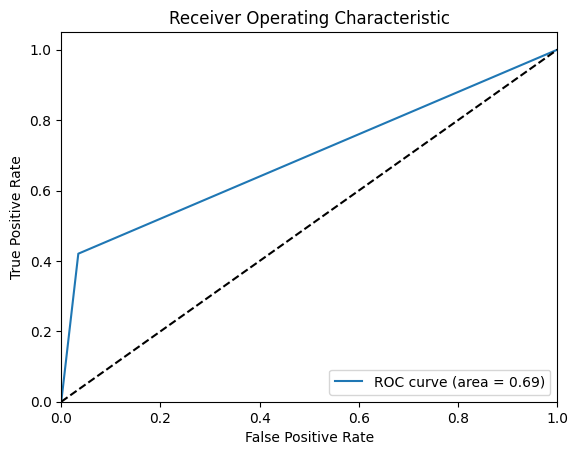

In [61]:
# plot the graph of the model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()